# 1. Diabetes Risk Stratification and Dataset Shift

## 1.0 Read in Data

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

path_to_project = os.path.abspath(os.path.join(os.getcwd(), '../'))    
sys.path.insert(1, os.path.join(path_to_project))

In [2]:
from src.directory import diabetic_filepath
import pandas as pd

In [3]:
# read data
diabetic_df = pd.read_csv(diabetic_filepath)

# convert missing data to nan
diabetic_df.replace({'?': float('nan')}, inplace=True)

# sort values by ages
diabetic_df.sort_values(by='age', inplace=True)

In [4]:
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# set column names
readmission_col = 'readmitted'
age_col = 'age'
gender_col = 'gender'
race_col = 'race'
readmission_30_val = '<30'

In [6]:
# set numeric and categorical cols
numeric_predictor_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
ordinal_predictor_cols = ['age']
categorical_predictor_cols = ['race', 'gender', 
       #'diag_1', 'diag_2', 'diag_3',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [7]:
# encode outcome col
outcome_col = 'y'
diabetic_df[outcome_col] = diabetic_df[readmission_col] == readmission_30_val

# set predictor cols
predictor_cols = numeric_predictor_cols + categorical_predictor_cols + ordinal_predictor_cols

## 1.1 Data Exploration

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# get head
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,y
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,False
14923,57716712,76430070,Caucasian,Male,[0-10),[0-25),6,1,17,4,...,Up,No,No,No,No,No,Ch,Yes,>30,False
14892,57623322,97918434,Caucasian,Male,[0-10),NaN,1,1,7,1,...,No,No,No,No,No,No,No,No,NO,False
7669,35940402,17596530,Caucasian,Female,[0-10),NaN,3,1,1,2,...,Steady,No,No,No,No,No,No,Yes,NO,False
7751,36107376,18055827,Caucasian,Male,[0-10),NaN,2,1,1,2,...,Steady,No,No,No,No,No,No,Yes,NO,False


In [10]:
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'y'],
      dtype='object')

In [11]:
diabetic_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [12]:
diabetic_df[readmission_col].unique()

array(['NO', '>30', '<30'], dtype=object)

/tmp/ipykernel_75185/4172984513.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmission_30_df.sort_values(by=age_col, inplace=True)
/tmp/ipykernel_75185/4172984513.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_75185/4172984513.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_75185/4172984513.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xtickla

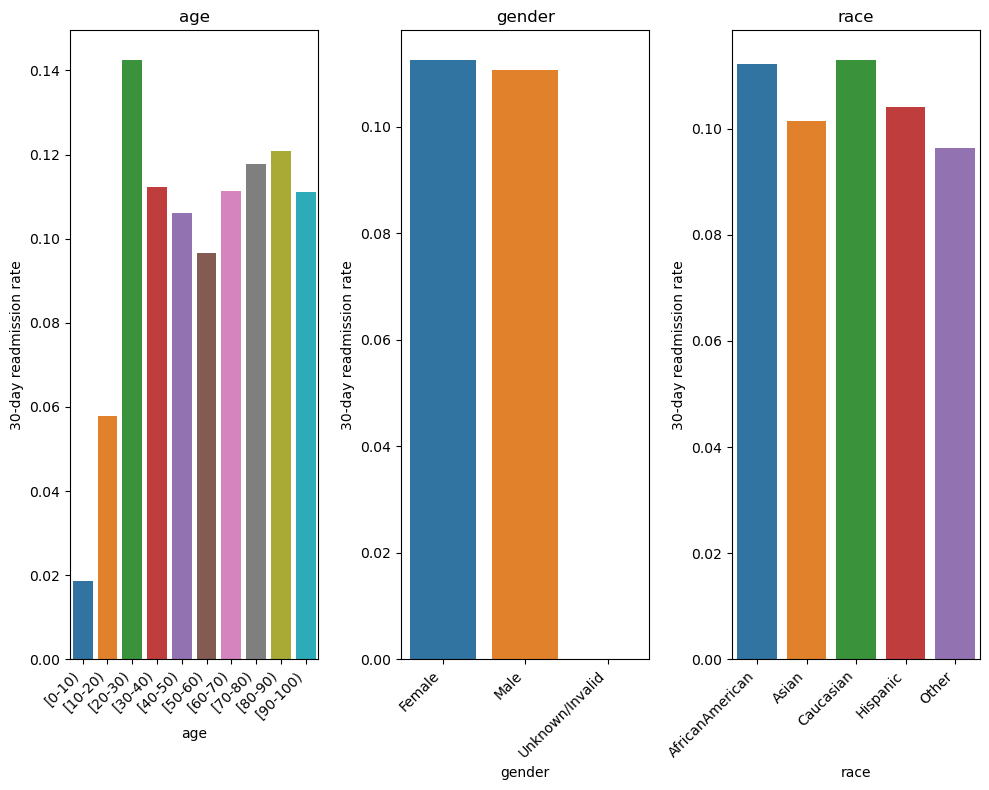

In [13]:
group_keys = [age_col, gender_col, race_col]

# create figure
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 8))

# get patients who were readmitted <30 days
readmission_30_df = diabetic_df.query(f'{readmission_col} == "{readmission_30_val}"')

# sort values by age
readmission_30_df.sort_values(by=age_col, inplace=True)

# plot
for key, ax in zip(group_keys, axes.flat):

    # get hue order
    hue_order = readmission_30_df[age_col] if key == age_col else None
    
    # get rates of readmission (out of all patients)
    group_rates = readmission_30_df.groupby(key)[outcome_col].count() / diabetic_df.groupby(key).count()[outcome_col]
    group_rates = group_rates.reset_index()
    
    sns.barplot(data=group_rates, x=key, y=outcome_col, hue=key, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(key)
    ax.set_ylabel('30-day readmission rate')

plt.tight_layout()

## 1.2 Model Development

In [14]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [15]:
import gc
from collections import defaultdict
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, VarianceThreshold
# from src.lightning_pipelines import MLPClassifier_training_pipeline
from sklearnex.linear_model import LogisticRegression
from sklearnex.ensemble import RandomForestClassifier
from confidenceinterval import roc_auc_score

In [16]:
models = [LogisticRegression, RandomForestClassifier, MLPClassifier] 
cv = 3 # set k-fold for CV

In [17]:
# set hyperparameter grid to search
hp_grids = {
    MLPClassifier.__name__ : {
        'hidden_layer_sizes': [(128,), (64,64)],
        'alpha': [1e-4, 1e-3],
        'learning_rate_init': [1e-4, 1e-3],
        'early_stopping': [True]
    },
    # 'MLPLightningClassifier': {
    #     'init_lr':[1e-3, 1e-4],
    #     'hidden_dim':[64, 128],
    #     'num_layers':[1,2],
    # },
    DecisionTreeClassifier.__name__ : {
        'criterion': ['gini'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4],
    },
    LogisticRegression.__name__ : {
        'penalty': ['l1', 'l2'],
        'C': [1e-1, 5e-1, .99],
        'solver': ['saga'],
        # 'max_iter': [1000]
    },
    RandomForestClassifier.__name__ : {
        'criterion': ['entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

In [18]:
# split train/test data
train_data, test_data = train_test_split(diabetic_df, test_size=.2, stratify=diabetic_df[outcome_col], random_state=12)

In [19]:
# define model training loop
def train_models(models, params, grid_search=True, cv=3, random_state=40):
  results = defaultdict(dict)
  
  for i, model in enumerate(models):
    model_name = model.__name__
    
    # solution for multicollinearity
    if model_name == LogisticRegression.__name__:
      ohe_kwargs = dict(drop='first')
    else:
      ohe_kwargs = dict(drop='if_binary')
    
    # fit encoders
    ohe = OneHotEncoder(sparse_output=False, **ohe_kwargs)
    ohe.fit(diabetic_df[categorical_predictor_cols])
    ohe_cols = ohe.get_feature_names_out().tolist()

    oe = OrdinalEncoder()
    oe.fit(diabetic_df[ordinal_predictor_cols]) 

    def preprocess_data(df):
      # create new df; add ohe cols df & drop non-ohe columns
      data = pd.concat([df[[*numeric_predictor_cols, outcome_col]].copy(),
                            pd.DataFrame(ohe.transform(df[categorical_predictor_cols]), columns=ohe_cols, index=df.index),
                            pd.DataFrame(oe.transform(df[ordinal_predictor_cols]), columns=ordinal_predictor_cols, index=df.index),
                            ], axis=1)

      return data
    
    transformed_predictor_cols = numeric_predictor_cols + ordinal_predictor_cols + ohe_cols
    
    # preprocess data
    train_df = preprocess_data(train_data)
    
    transform_kwargs = dict(transform="pandas")
    
    # define pipeline args
    pipeline_args = [
      ("column_transform", ColumnTransformer([
            ('numeric', StandardScaler(), numeric_predictor_cols),
            ('untransformed', 'passthrough', ohe_cols+ordinal_predictor_cols)
      ]).set_output(**transform_kwargs)),
      ('polynomial', PolynomialFeatures(2).set_output(**transform_kwargs))
    ]
    
    fs_pipeline_args = [
      ('remove_constant', VarianceThreshold(threshold=0).set_output(**transform_kwargs)),
      ('feature_selection', SelectPercentile(percentile=15).set_output(**transform_kwargs)),
    ]
    
    fs_pipeline = Pipeline([*pipeline_args, *fs_pipeline_args])
    selected_features = fs_pipeline.fit_transform(train_df[transformed_predictor_cols], train_df[outcome_col])
        
    pipeline_args.append(ColumnTransformer([
        ('untransformed', 'passthrough', selected_features.columns)
      ]).set_output(**transform_kwargs))
    
    pipeline_args = []
    
    if grid_search:
      print(f'Running CV Grid Search for {model_name}')
      clf = GridSearchCV(estimator=model(random_state=random_state), 
                         param_grid=params[model_name], 
                         scoring='roc_auc', 
                         cv=cv, 
                         verbose=2) # Stratified KFold CV
    else:
      print(f'Training single instance of {model_name}')
      clf = model(random_state=random_state, **params[model_name])
    
    # train model
    print(f'Using {len(selected_features.columns)} features.')
    clf.fit(selected_features, train_df[outcome_col])
    
    # log results
    results[model_name]['clf'] = clf
    
    if not grid_search:
      test_df = preprocess_data(test_data)
      y_pred = clf.predict_proba(fs_pipeline.transform(test_df[transformed_predictor_cols]))
      auc, ci = roc_auc_score(y_pred=y_pred[:,-1], 
                              y_true=test_data[outcome_col].astype(int), 
                              confidence_level=0.95)
      results[model_name]['auc'] = dict(auc=auc, ci=ci)
      
  # return results, selected_features
    return results

In [20]:
# perform CV grid search
cv_results_linear = train_models(models[0:1], hp_grids, cv=cv)
# cv_results_linear, _ = train_models(models[0:1], hp_grids, cv=cv)
# del _; gc.collect()

Running CV Grid Search for LogisticRegression
Using 693 features.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=  37.8s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=  44.6s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=  35.3s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=  24.2s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=  26.2s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=  30.9s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=  46.2s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=  45.5s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=  49.7s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l2, solver=saga; total time=  43.3s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l2, solver=saga; total time=  34.3s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l2, solver=saga; total time=  36.9s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.99, penalty=l1, solver=saga; total time=  56.2s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.99, penalty=l1, solver=saga; total time=  51.8s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.99, penalty=l1, solver=saga; total time=  57.0s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.99, penalty=l2, solver=saga; total time=  34.1s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.99, penalty=l2, solver=saga; total time=  36.3s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.99, penalty=l2, solver=saga; total time=  37.8s


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
cv_results_tree = train_models(models[1:2], hp_grids, cv=cv)
# cv_results_tree, selected_features = train_models(models[1:2], hp_grids, cv=cv)

Running CV Grid Search for RandomForestClassifier
Using 987 features.
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=  38.6s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=  48.3s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=  37.8s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=  42.1s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=  40.2s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=  36.6s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=  37.3s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=  38.8s
[CV] END criterion=entropy, max_de

In [22]:
cv_results_mlp = train_models(models[2:3], hp_grids, cv=cv)

Running CV Grid Search for MLPClassifier
Using 987 features.
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.0001; total time=  57.3s
[CV] END alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.0001; total time=  38.6s
[CV] END alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.0001; total time=  34.3s
[CV] END alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=  26.4s
[CV] END alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=  34.5s
[CV] END alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=  36.2s
[CV] END alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64), learning_rate_init=0.0001; total time=  26.7s
[CV] END alpha=0.0001, early_stopping=True, hidden_layer_size

### Train Neural Net on Lightning

In [23]:
# from src.lightning_pipelines import MLPClassifier_training_pipeline
# from itertools import product

In [24]:
# # set training variables & labels
# dataset_name = 'Diabetes10Year'
# mlp_model_name = 'MLPLightningClassifier'

# # hyperparamters
# max_epochs = 50
# patience = 5  # for early stopping

# # logging params
# wandb_kwargs = dict(project_name='CPH_200C', 
#                     wandb_entity='furtheradu', 
#                     dir_path='notebooks/..',
#                     offline=True)

# # init dataframe for best params
# index = pd.MultiIndex.from_product([range(cv), *hp_grids[mlp_model_name].values()],
#                                    names=['split', *hp_grids[mlp_model_name].keys()])
# MLP_cv_results = pd.DataFrame(columns=['auc'], index=index)

In [25]:
# # CV grid search on MLP
# max_epochs = 1
# for fold in range(cv):
#     for (init_lr, hidden_dim, num_layers) in product(*hp_grids[mlp_model_name].values()):
        
#         pipeline_out = MLPClassifier_training_pipeline(
#                 raw_data=pd.concat([selected_features,
#                                     train_data[[outcome_col]]], axis=1),
#                 model_name=mlp_model_name,
#                 outcome_col=outcome_col,
#                 input_features=selected_features.columns.tolist(),
#                 dataset_name=dataset_name,
#                 wandb_kwargs=wandb_kwargs,
#                 max_epochs=max_epochs,
#                 patience=patience,
#                 fold=fold,
#                 n_splits=cv,
#                 hidden_dim=hidden_dim,
#                 num_layers=num_layers,
#                 init_lr=init_lr,            
#             )

#         trainer, model, datamodule = [pipeline_out[x] for x in ['trainer', 'model', 'datamodule']]
    
#         print("Testing model")
#         test_pred = trainer.test(model, datamodule)[0]
        
#         # unpack test prediction AUC
#         test_auc = test_pred['test_auc']
        
#         # update dataframe with performance
#         MLP_cv_results.loc[(fold, init_lr, hidden_dim, num_layers)] = test_auc

In [26]:
cv_results = {**cv_results_linear, **cv_results_tree, **cv_results_mlp}

In [27]:
model_names = [model.__name__ for model in models] # + [mlp_model_name]
split_test_score_keys = [f'split{i}_test_score' for i in range(cv)]

In [28]:
# get best params across models
best_params = {model_name : cv_results[model_name]['clf'].best_params_ for model_name in cv_results.keys()}

# get best params as model init kwargs
for mlp_model_name, params in best_params.items():
    best_params[mlp_model_name] = {k.replace(f'{mlp_model_name}__', ''):v for k,v in params.items()}
    
# # add lightning MLP results
# best_params[mlp_model_name] = dict(zip(hp_grids[mlp_model_name].keys(),
#                                     *MLP_cv_results.groupby(list(hp_grids[mlp_model_name].keys())).mean().idxmax()))
        
best_params

{'LogisticRegression': {'C': 0.99, 'penalty': 'l2', 'solver': 'saga'},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 'MLPClassifier': {'alpha': 0.0001,
  'early_stopping': True,
  'hidden_layer_sizes': (64, 64),
  'learning_rate_init': 0.001}}

In [29]:
# create df with peformance results per CV split for best params
best_params_score_df = pd.DataFrame(columns=split_test_score_keys,
                                    index=model_names)

for mlp_model_name, score_key in product(best_params.keys(), split_test_score_keys):
    best_params_idx = cv_results[mlp_model_name]['clf'].cv_results_['params'].index(cv_results[mlp_model_name]['clf'].best_params_)
    best_params_score_df.loc[(mlp_model_name, score_key)] = cv_results[mlp_model_name]['clf'].cv_results_[score_key][best_params_idx]
    
# # add lightning MLP results
# best_params_score_df.loc[(mlp_model_name, slice(None))] = MLP_cv_results.loc[(slice(None), *best_params[mlp_model_name].values())].values.squeeze()

In [30]:
# check all scores greater than threshold
score_threshold = .65
best_params_score_df #> score_threshold

,split0_test_score,split1_test_score,split2_test_score
LogisticRegression,0.664768,0.656064,0.661038
RandomForestClassifier,0.6727,0.671166,0.669838
MLPClassifier,0.671769,0.658818,0.659283


In [31]:
# train models on best params
best_linear_results = train_models(models[0:1], best_params, grid_search=False)
# best_linear_results, _ = train_models(models[0:1], best_params, grid_search=False)
# del _; gc.collect()

Training single instance of LogisticRegression
Using 693 features.


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
best_tree_results = train_models(models[1:2], best_params, grid_search=False)
# best_tree_results, _ = train_models(models[1:2], best_params, grid_search=False)
# del _; gc.collect()

Training single instance of RandomForestClassifier
Using 987 features.


In [33]:
best_MLP_results = train_models(models[2:3], best_params, grid_search=False)
# best_MLP_results, _ = train_models(models[2:3], best_params, grid_search=False)
# del _; gc.collect()

Training single instance of MLPClassifier
Using 987 features.


In [34]:
# pipeline_out = MLPClassifier_training_pipeline(
#     raw_data=pd.concat([selected_features,
#                         train_data[[outcome_col]]], axis=1),
#     model_name=mlp_model_name,
#     outcome_col=outcome_col,
#     input_features=selected_features.columns.tolist(),
#     dataset_name=dataset_name,
#     wandb_kwargs=wandb_kwargs,
#     max_epochs=max_epochs,
#     patience=patience,
#     fold=fold,
#     n_splits=cv,
#     **best_params[mlp_model_name]          
# )

# trainer, model, datamodule = [pipeline_out[x] for x in ['trainer', 'model', 'datamodule']]

# print("Testing model")
# test_pred = trainer.test(model, datamodule)[0]

In [35]:
# # unpack test prediction AUC
# test_auc = test_pred['test_auc']
# ci = (test_pred['test_ci_lower'], test_pred['test_ci_upper'])

# # update dict with performance
# best_MLP_results = {mlp_model_name: {
#                         'auc':{
#                             'auc': test_auc, 
#                             'ci':ci
#                             }
#                         }
#                     }

In [36]:
best_params_results = {**best_linear_results, **best_tree_results, **best_MLP_results}

### Get items for report

In [37]:
# get predictor variables in latex
predictor_df = pd.DataFrame.from_dict(
    dict(zip(['numerical', 'ordinal', 'categorical'],
             [numeric_predictor_cols, ordinal_predictor_cols, categorical_predictor_cols])),
    orient='index').T

predictor_df = predictor_df.replace('_', '\_', regex=True)

print(predictor_df.to_latex(index=False, 
                            label=f'tab:predictor_variables',
                            caption=f'Predictor variables used for model training by data type.',
                            sparsify=True,
                            na_rep='-'))

\begin{table}
\caption{Predictor variables used for model training by data type.}
\label{tab:predictor_variables}
\begin{tabular}{lll}
\toprule
numerical & ordinal & categorical \\
\midrule
time\_in\_hospital & age & race \\
num\_lab\_procedures & - & gender \\
num\_procedures & - & admission\_type\_id \\
num\_medications & - & discharge\_disposition\_id \\
number\_outpatient & - & admission\_source\_id \\
number\_emergency & - & max\_glu\_serum \\
number\_inpatient & - & A1Cresult \\
number\_diagnoses & - & metformin \\
- & - & repaglinide \\
- & - & nateglinide \\
- & - & chlorpropamide \\
- & - & glimepiride \\
- & - & acetohexamide \\
- & - & glipizide \\
- & - & glyburide \\
- & - & tolbutamide \\
- & - & pioglitazone \\
- & - & rosiglitazone \\
- & - & acarbose \\
- & - & miglitol \\
- & - & troglitazone \\
- & - & tolazamide \\
- & - & examide \\
- & - & citoglipton \\
- & - & insulin \\
- & - & glyburide-metformin \\
- & - & glipizide-metformin \\
- & - & glimepiride-pioglitazo

In [50]:
# get hyperparamters in latex
hp_grid_df = pd.DataFrame.from_dict(hp_grids)
hp_grid_df.drop(columns=['DecisionTreeClassifier'], inplace=True)
hp_grid_df.index = hp_grid_df.index.str.replace('_', ' ')

print(hp_grid_df.to_latex(index=True, 
                        label=f'tab:hyperparam_grid',
                        caption=f'Hyperparameters searched over by model class',
                        sparsify=True,
                        na_rep='-'))

\begin{table}
\caption{Hyperparameters searched over by model class}
\label{tab:hyperparam_grid}
\begin{tabular}{llll}
\toprule
 & MLPClassifier & LogisticRegression & RandomForestClassifier \\
\midrule
hidden layer sizes & [(128,), (64, 64)] & - & - \\
alpha & [0.0001, 0.001] & - & - \\
learning rate init & [0.0001, 0.001] & - & - \\
early stopping & [True] & - & - \\
criterion & - & - & ['entropy'] \\
max depth & - & - & [None, 5, 10] \\
min samples split & - & - & [2, 10] \\
min samples leaf & - & - & [1, 2, 4] \\
penalty & - & ['l1', 'l2'] & - \\
C & - & [0.1, 0.5, 0.99] & - \\
solver & - & ['saga'] & - \\
\bottomrule
\end{tabular}
\end{table}



In [65]:
# get CV fold scores in latex
best_params_score_df.columns = best_params_score_df.columns.str.replace('test|_|score|split', '', regex=True)
best_params_score_df = best_params_score_df.T
best_params_score_df.index.name = 'split'
print(best_params_score_df.T.to_latex(index=True, 
                                    label=f'tab:cv_best_params',
                                    caption=f'Model AUC on the validation set for each across cross validation folds. \
                                        Results are from models trained with hyperparameters achieving the best mean\
                                            AUC across folds.',
                                    sparsify=True,
                                    float_format="%.3f"))

\begin{table}
\caption{Model AUC on the validation set for each across cross validation folds.                                         Results are from models trained with hyperparameters achieving the best mean                                            AUC across folds.}
\label{tab:cv_best_params}
\begin{tabular}{llll}
\toprule
split & LogisticRegression & RandomForestClassifier & MLPClassifier \\
split &  &  &  \\
\midrule
0   & 0.665 & 0.673 & 0.672 \\
1   & 0.656 & 0.671 & 0.659 \\
2   & 0.661 & 0.670 & 0.659 \\
\bottomrule
\end{tabular}
\end{table}



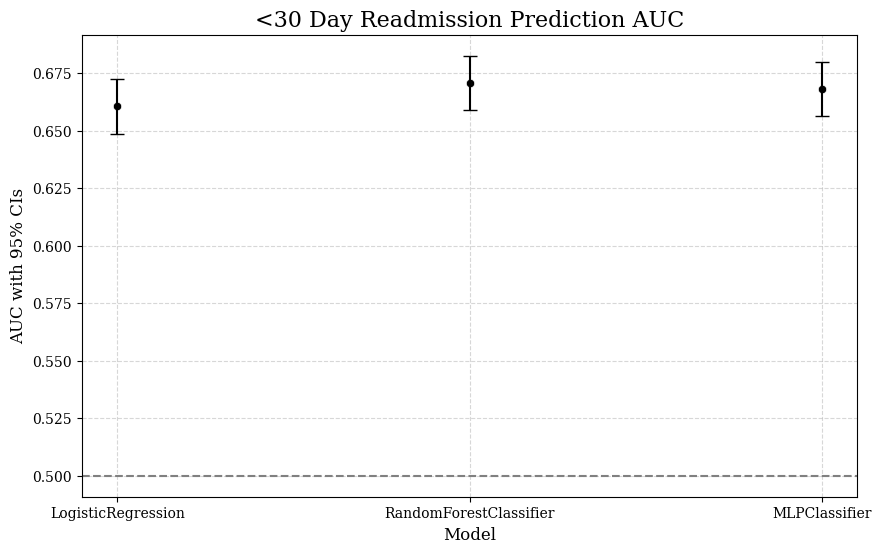

In [39]:
from src.utils import plot_points_with_ci
from operator import itemgetter

# create df for results plotting
plot_df = pd.DataFrame(index=model_names, columns=['auc', 'se'])
plot_df.index.name = 'model'

for mlp_model_name in model_names:
    auc, ci = itemgetter('auc', 'ci')(best_params_results[mlp_model_name]['auc'])
    se = abs(ci[0] - ci[1]) / (2 * 1.96) # calculate stanrdard error from 95% interval
    plot_df.loc[mlp_model_name] = auc, se

plot_df.reset_index(inplace=True)
    
plot_points_with_ci(plot_df, 
                    x_col='model',
                    y_col='auc',
                    se_col='se',
                    title='<30 Day Readmission Prediction AUC',
                    x_label='Model',
                    y_label='AUC with 95% CIs',
                    output_path='../figures/readmission_prediction_AUC.png')


## 1.3 Distribution Shift

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from src.utils import Columns

In [41]:
# set up best-performing model
mlp_model_name = LogisticRegression.__name__
linear_model = LogisticRegression(random_state=40, **best_params[mlp_model_name])

# fit encoders
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit(diabetic_df[categorical_predictor_cols])
ohe_cols = ohe.get_feature_names_out().tolist()

oe = OrdinalEncoder()
oe.fit(diabetic_df[ordinal_predictor_cols])

# get training dfs
train_df = pd.concat([diabetic_df[[*numeric_predictor_cols, outcome_col]],
                      pd.DataFrame(oe.transform(diabetic_df[ordinal_predictor_cols]), columns=ordinal_predictor_cols, index=diabetic_df.index),
                      pd.DataFrame(ohe.transform(diabetic_df[categorical_predictor_cols]), columns=ohe_cols, index=diabetic_df.index)],
                     axis=1)
transformed_predictor_cols = numeric_predictor_cols + ohe_cols + ordinal_predictor_cols

# split by age
encoding_up_to_50 = oe.transform([['[40-50)']]).squeeze()
younger_50_idx = train_df['age'] <= encoding_up_to_50
younger50_df = train_df[younger_50_idx]
older50_df = train_df[~younger_50_idx]

# make pipeline
pipeline = Pipeline([
("features", FeatureUnion([
    ('numeric_transform', make_pipeline(Columns(names=numeric_predictor_cols),
                                        StandardScaler())),
    ('no_transform', make_pipeline(Columns(names=ordinal_predictor_cols+ohe_cols),
                                        )),
    ])),
(mlp_model_name, linear_model),
])

# set score function
score_func = roc_auc_score

/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [42]:
# Train a model on only patients younger than 50.
pipeline.fit(younger50_df[transformed_predictor_cols], younger50_df[outcome_col])

# What is the performance of the best linear model trained and tested on patients younger than 50? 
younger50_score = score_func(y_true=younger50_df[outcome_col], 
                             y_pred=pipeline.predict_proba(younger50_df[transformed_predictor_cols])[:,1])
print(f'Younger than 50 score {score_func.__name__}:', younger50_score)

# Using patients older than 50 as a target distribution, what is the performance of the younger-than-50 model on the older than 50 population?
older50_score = score_func(y_true=older50_df[outcome_col], 
                           y_pred=pipeline.predict_proba(older50_df[transformed_predictor_cols])[:,1])
print(f'Older than 50 {score_func.__name__}:', older50_score)


/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Younger than 50 score roc_auc_score: (0.72257596, (0.7096709275071194, 0.7354809975798557))
Older than 50 roc_auc_score: (0.6438467203295262, (0.6380044474545873, 0.649688993204465))


In [ ]:
# compute differences/feature importance


In [79]:
# get table in latex
shift_df = pd.DataFrame([[older50_score[0], *older50_score[1]],
                         [younger50_score[0], *younger50_score[1]]],
                        index=['Patients >= 50', 'Patients < 50'], 
                        columns=['auc', 'ci lower', 'ci upper'])
shift_df.index.name = 'Test set'

print(shift_df.to_latex(index=True, 
                        label=f'tab:shift_performance',
                        caption=f'AUC of {mlp_model_name} trained on data from patients <50yo',
                        sparsify=True,
                        float_format='%.3f'))

\begin{table}
\caption{AUC of LogisticRegression trained on data from patients <50yo}
\label{tab:shift_performance}
\begin{tabular}{lrrr}
\toprule
 & auc & ci lower & ci upper \\
Test set &  &  &  \\
\midrule
Patients >= 50 & 0.644 & 0.638 & 0.650 \\
Patients < 50 & 0.723 & 0.710 & 0.735 \\
\bottomrule
\end{tabular}
\end{table}



# 2 FDA Request for Comments

The two notable parts in the draft guidance are (1) the risk-based credibility assessment framework and (2) the recommendation to engage with different FDA groups to appropriately set expectationson on how credibility is assessed and maintained during the regulatory life cycle of models proposed for deployment.



# 3 MIMIC-IV Warm-up

In [44]:
import pandas as pd
from src.directory import data_dir

Anchor year groups are deidentified pieces of information that allow researchers to infer the approximate year a patient received care. They are method to preserve temporal privacy of patient encounters and necessary to provide some understanding of the time period during which data was generated, allowing researchers to estimate and account for potential dataset shift.

The documentation for the MIMIC-IV dataset states: "All dates in MIMIC-IV have been deidentified by shifting the dates into a future time period between 2100 - 2200. The anchor_year column is a deidentified year occurring sometime between 2100 - 2200, and the anchor_year_group column is one of the following values: "2008 - 2010", "2011 - 2013", "2014 - 2016", "2017 - 2019", and "2020 - 2022"."

In [45]:
# SQL Query
# SELECT 
#   anchor_year_group, COUNT(DISTINCT subject_id) 
# AS 
#   num_unique_patients
# FROM
#   `physionet-data.mimiciv_3_1_hosp.patients`
# GROUP BY 
#   anchor_year_group

In [ ]:
anchor_df = pd.read_csv(os.path.join(data_dir, 'MIMIC_IV_patients_by_anchor_year.csv'))
anchor_df.columns = anchor_df.columns.str.replace('_', ' ').str.capitalize()

print(anchor_df.to_latex(index=False, 
                        label=f'tab:patients_by_anchor_year',
                        caption=f'Number of unique patient by anchor year in the MIMIC-IV v3.1 dataset.',
                        sparsify=True))

\begin{table}
\caption{Number of unique patient by anchor year in the MIMIC-IV v3.1 dataset.}
\label{tab:patients_by_anchor_year}
\begin{tabular}{lr}
\toprule
Anchor year group & Num unique patients \\
\midrule
2017 - 2019 & 65941 \\
2008 - 2010 & 101607 \\
2011 - 2013 & 76266 \\
2014 - 2016 & 71640 \\
2020 - 2022 & 49173 \\
\bottomrule
\end{tabular}
\end{table}

